In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors

influenza_data_path = 'Resources/flu_gpd_summary.csv'
influenza_data = pd.read_csv(influenza_data_path)

population_data_path = 'Resources/country_population.csv'
population_data = pd.read_csv(population_data_path)

population_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


In [2]:
influenza_data.columns

Index(['Country Code', 'Country Name', 'Year', 'Cases', 'GDP'], dtype='object')

In [3]:
population22 = population_data[['Country Name','2022']]
population22.head()

,Country Name,2022
0,Aruba,106445.0
1,Africa Eastern and Southern,720839314.0
2,Afghanistan,41128771.0
3,Africa Western and Central,490330870.0
4,Angola,35588987.0


In [4]:
influenza_22 = influenza_data[influenza_data['Year'].isin([2022])]
influenza_22

,Country Code,Country Name,Year,Cases,GDP
15,ALB,Albania,2022,364,1.888210e+10
18,ARE,United Arab Emirates,2022,1360,5.080000e+11
24,ARG,Argentina,2022,26585,6.330000e+11
30,ARM,Armenia,2022,148,1.950278e+10
35,ATG,Antigua and Barbuda,2022,0,1.757604e+09
...,...,...,...,...,...
753,USA,United States of America,2022,470104,2.550000e+13
759,UZB,Uzbekistan,2022,62,8.039185e+10
765,ZAF,South Africa,2022,1171,4.060000e+11
771,ZMB,Zambia,2022,347,2.978445e+10


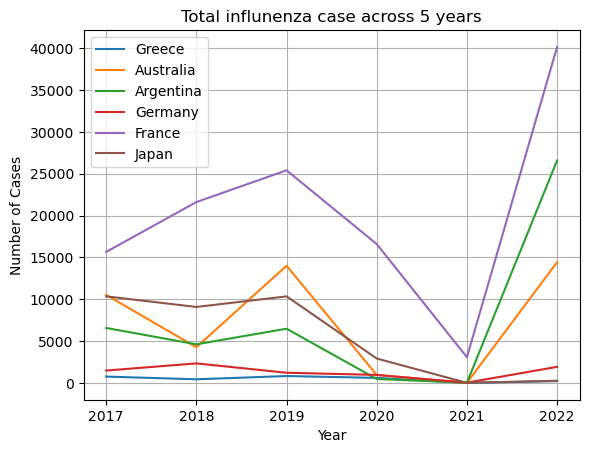

In [5]:
fig,ax = plt.subplots()

Country_choices = ['Greece','Australia','Argentina','Germany','France', 'Japan']

for country in Country_choices:
    case_over_time = influenza_data.loc[influenza_data['Country Name'] == country]
    ax.plot(case_over_time['Year'],case_over_time['Cases'], label =country)
    
plt.grid() 
plt.title("Total influnenza case across 5 years")
plt.legend(loc="upper left") 
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()

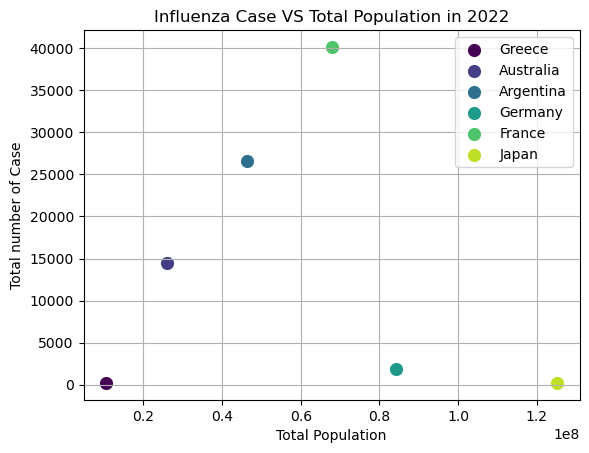

In [6]:
filtered_df = pd.DataFrame()

merged_df = influenza_22.merge(population22, left_on="Country Name", right_on="Country Name")
merged_df.rename(columns = {'2022':'Population'}, inplace = True)
column_test = merged_df[['Country Name', 'Cases', 'Population']]

for country in Country_choices:
    specific_country = column_test.loc[column_test['Country Name'] == country]
    filtered_df = pd.concat([filtered_df,specific_country[:]]).reset_index(drop=True)
fig, ax = plt.subplots()
country = filtered_df['Country Name']

colormap = cm.viridis
colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(filtered_df['Country Name']))]

for i,c in enumerate(colorlist):
    x = filtered_df['Population'][i]
    y = filtered_df['Cases'][i]
    l = filtered_df['Country Name'][i]

    plt.scatter(x, y, label=l, linewidth=0.1, c=c, s=88)
    
plt.grid()
plt.legend()
plt.title("Influenza Case VS Total Population in 2022")
plt.xlabel("Total Population")
plt.ylabel("Total number of Case")
plt.show()

In [14]:
filtered_df

,Country Name,Cases,Population
0,Greece,221,10566531.0
1,Australia,14433,25978935.0
2,Argentina,26585,46234830.0
3,Germany,1923,84079811.0
4,France,40148,67935660.0
5,Japan,262,125124989.0
